In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

d = pd.read_csv('aggregation/analysis_df_10232024.csv')

# basic exploratory analysis

In [56]:
pd.set_option('display.max_columns', 500)
d['p_y_percentile'] = d['p_y'].rank(pct=True) * 100
d['confirmed_flooded_image'] = d['at_least_one_positive_image_by_area_if_you_have_100_images'] == 1

d['white_frac'] = d['nhl_white_alone'] / d['total_population'] 
d['black_frac'] = d['nhl_black_alone'] / d['total_population']
d['hispanic_frac'] = d['hispanic_alone'] / d['total_population']
d['asian_frac'] = d['nhl_asian_alone'] / d['total_population']

d.head()


,GEOID,CTLabel,BoroName,BoroCT2020,NTAName,CDTANAME,PUMA,p_y,p_y_CI_lower,p_y_CI_upper,at_least_one_positive_image_by_area,at_least_one_positive_image_by_area_CI_lower,at_least_one_positive_image_by_area_CI_upper,empirical_estimate,at_least_one_positive_image_by_area_if_you_have_100_images,at_least_one_positive_image_by_area_if_you_have_100_images_CI_lower,at_least_one_positive_image_by_area_if_you_have_100_images_CI_upper,n_images_by_area,total_population,nhl_white_alone,nhl_black_alone,hispanic_alone,nhl_asian_alone,n_sensors,dep_light_1_area,dep_light_2_area,dep_light_3_area,dep_moderate_1_area,dep_moderate_2_area,geometry,sewer_backup_311c,street_flooding_311c,catch_basin_clogged/flooding_311c,manhole_overflow_311c,highway_flooding_311c,p_y_percentile,confirmed_flooded_image,white_frac,black_frac,hispanic_frac,asian_frac
0,36061000100,1.00,Manhattan,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),4121,0.004357,0.000315,0.019329,0.000000,0.000000,0.000000,NaN,0.288467,0.030997,0.857979,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,MULTIPOLYGON (((972081.3848451903 190736.47337...,0,0,0,0,0,94.924731,False,NaN,NaN,NaN,NaN
1,36061000201,2.01,Manhattan,1000201,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,0.002747,0.000933,0.006329,0.548568,0.258224,0.868888,0.000000,0.233284,0.089122,0.470015,320,2666,238,216,1747,400,0.0,10591.495657,1337.909512,744.724547,0.000000,0.000000,POLYGON ((988547.8180459075 197773.38284207642...,0,0,0,0,0,59.096774,False,0.089272,0.081020,0.655289,0.150038
2,36061000600,6.00,Manhattan,1000600,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,0.003491,0.001280,0.007621,1.000000,1.000000,1.000000,0.002367,1.000000,1.000000,1.000000,845,10751,859,654,3301,5567,0.0,118015.616870,49142.102831,223950.935848,22123.775465,6619.532228,POLYGON ((986960.7849056397 199556.65151809782...,0,1,0,0,0,89.505376,True,0.079900,0.060832,0.307041,0.517812
3,36061001401,14.01,Manhattan,1001401,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,0.002494,0.000954,0.005331,0.352224,0.159450,0.622002,0.000000,0.216004,0.091026,0.414063,182,3165,2224,85,314,251,0.0,31979.174030,8167.130363,0.000000,0.000000,0.000000,POLYGON ((987474.6159781564 200300.22650894185...,1,0,0,0,0,24.989247,False,0.702686,0.026856,0.099210,0.079305
4,36061001402,14.02,Manhattan,1001402,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,0.002184,0.000753,0.005009,0.758596,0.440340,0.979171,0.000000,0.191671,0.072518,0.394760,771,3286,881,250,860,1099,0.0,119253.250840,51787.104526,0.000000,3811.632650,3627.562632,"POLYGON ((988387.2687167446 201261.3202922499,...",0,0,0,0,0,5.118280,False,0.268107,0.076080,0.261716,0.334449


In [60]:
d[['dep_light_1_area', 'dep_light_2_area', 'dep_light_3_area', 'dep_moderate_1_area', 'dep_moderate_2_area']].describe()

,dep_light_1_area,dep_light_2_area,dep_light_3_area,dep_moderate_1_area,dep_moderate_2_area
count,2.325000e+03,2.325000e+03,2.325000e+03,2325.000000,2325.000000
mean,1.704254e+05,1.305767e+05,1.375244e+05,33568.736899,17255.142646
std,1.926640e+05,2.015365e+05,7.969362e+05,77947.720054,49174.975593
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.756178e+04,1.274651e+04,0.000000e+00,0.000000,0.000000
50%,1.176228e+05,5.511028e+04,0.000000e+00,5211.095209,0.000000
75%,2.227261e+05,1.648135e+05,0.000000e+00,33654.810667,9705.671683
max,1.653186e+06,2.586617e+06,1.279555e+07,886875.919586,660828.326796


In [ ]:
d[['p_y', 'empirical_estimate', 'at_least_one_positive_image_by_area_if_you_have_100_images']].corr(method='spearman')

In [ ]:
d[['p_y', 'empirical_estimate', 'at_least_one_positive_image_by_area_if_you_have_100_images']].corr(method='pearson')

In [ ]:
# pairplot of these three using seaborn
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.scatterplot(data=d, x='empirical_estimate', y='p_y', alpha=0.3)
plt.subplot(1, 3, 2)
sns.scatterplot(data=d, x='empirical_estimate', y='at_least_one_positive_image_by_area_if_you_have_100_images', alpha=0.3)
plt.subplot(1, 3, 3)
sns.scatterplot(data=d, x='p_y', y='at_least_one_positive_image_by_area_if_you_have_100_images', alpha=0.3)
plt.subplots_adjust(wspace=0.5)



# 311

### sanity check: all correlations are positive. 

Optimization terminated successfully.
         Current function value: 0.541008
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534702
         Iterations 5


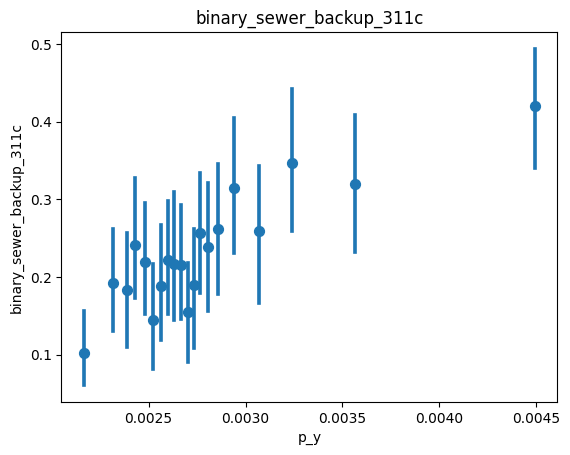

Optimization terminated successfully.
         Current function value: 0.414023
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413662
         Iterations 6


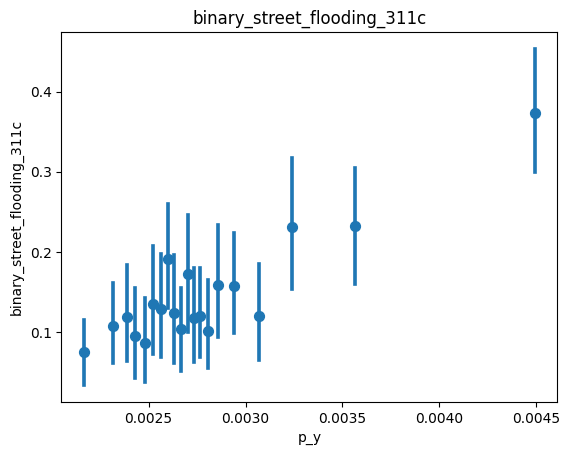

Optimization terminated successfully.
         Current function value: 0.402068
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.404254
         Iterations 6


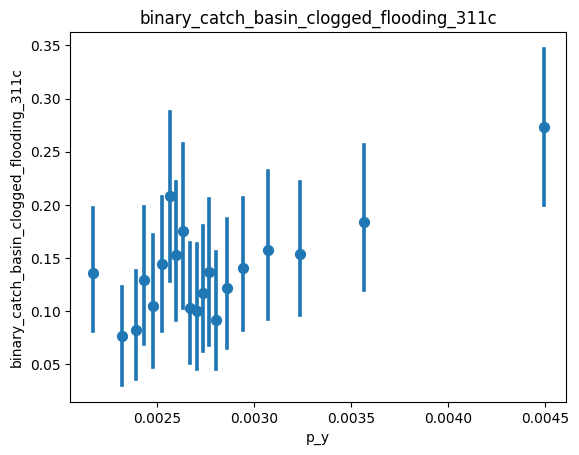

Optimization terminated successfully.
         Current function value: 0.072997
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.072864
         Iterations 9


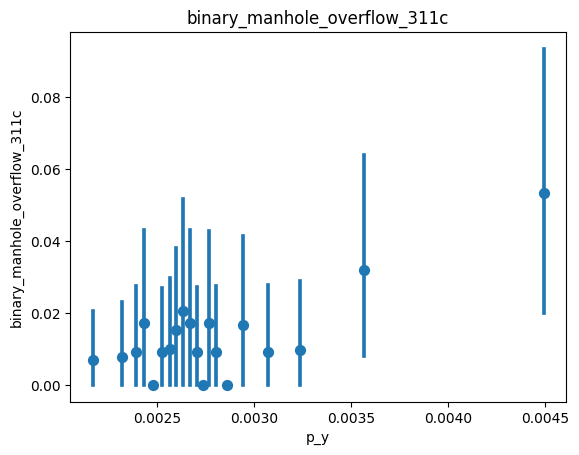

Optimization terminated successfully.
         Current function value: 0.003550
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.002297
         Iterations 19


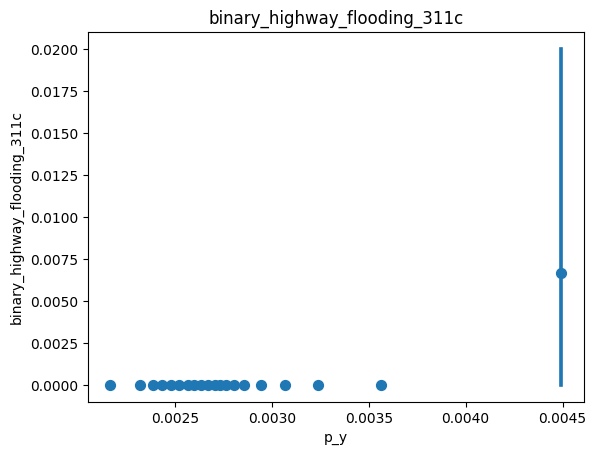

Optimization terminated successfully.
         Current function value: 0.654285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.653268
         Iterations 5


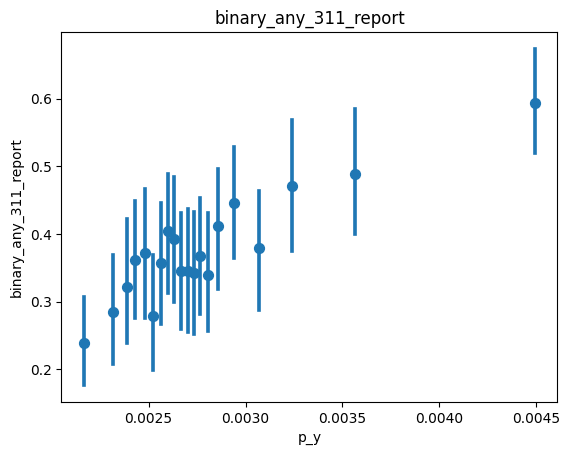

,binary_sewer_backup_311c I,binary_sewer_backup_311c II,binary_street_flooding_311c I,binary_street_flooding_311c II,binary_catch_basin_clogged_flooding_311c I,binary_catch_basin_clogged_flooding_311c II,binary_manhole_overflow_311c I,binary_manhole_overflow_311c II,binary_highway_flooding_311c I,binary_highway_flooding_311c II,binary_any_311_report I,binary_any_311_report II
Intercept,-1.5151***,-1.8360***,-2.2905***,-2.4855***,-2.1305***,-2.1873***,-4.5464***,-5.2229***,-8.2522***,-85.6530,-1.1060***,-1.0182***
,(0.0992),(0.1087),(0.1243),(0.1348),(0.0997),(0.1283),(0.2082),(0.4488),(1.1883),(81.3236),(0.1286),(0.0898)
p_y,110.8490***,,180.0330***,,103.3270***,,86.8913***,,113.1960,,206.1590***,
,(28.5470),,(35.5536),,(25.4146),,(25.4050),,(73.4888),,(41.7434),
p_y_percentile,,0.0125***,,0.0140***,,0.0073***,,0.0173***,,0.8231,,0.0102***
,,(0.0017),,(0.0021),,(0.0021),,(0.0065),,(0.8232),,(0.0015)


In [57]:
all_311_models = []
d['any_311_report'] = False
for k in d.columns:
    if '311' in k:
        d['any_311_report'] = d['any_311_report'] | (d[k] > 0) 

for k in d.columns:
    if ('311' in k):
        col_name = ('binary_%s' % k).replace('/', '_')
        d[col_name] = (d[k] > 0) * 1.
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y' % col_name, data = d).fit())
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y_percentile' % col_name, data = d).fit())
        # plot probability of 311 report as function of p_y
        plt.figure()
        sns.regplot(data=d, x='p_y', y=col_name,  x_bins=20, fit_reg=False)
        plt.title(col_name)
        plt.show()
        del d[col_name]
    

summary_col(all_311_models, stars=True)

### still, our model identifies lots of high-risk areas with no 311 reports!

In [70]:
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no 311 report: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_311_report'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_311_report'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no 311 report: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_311_report'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_311_report'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no 311 report: 0.500
Population in these locations: 782078.000
Fraction of locations at percentile 90 or higher of p_y with no 311 report: 0.433
Population in these locations: 331995.000
Fraction of locations at percentile 95 or higher of p_y with no 311 report: 0.402
Population in these locations: 132712.000
fraction of locations with confirmed positive image with no 311 report: 0.464
Population in these locations: 211409.000


### preliminary estimate of bias (todo: redo this with better measures of race and demographics). 

In [59]:
d['any_311_report'] = d['any_311_report'] * 1.

print("*****WARNING: YOU ARE NOT COMPUTING POPULATION CORRECTLY AT PRESENT****")

race_models = []
for col in ['white_frac', 'black_frac', 'hispanic_frac', 'asian_frac']:
    race_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    race_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())
summary_col(race_models, stars=True)

*****WARNING: YOU ARE NOT COMPUTING POPULATION CORRECTLY AT PRESENT****
Optimization terminated successfully.
         Current function value: 0.653434
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.659614
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.655508
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.661495
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.645610
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.651690
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654645
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.660934
         Iterations 4


,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII,any_311_report IIIII,any_311_report IIIIII,any_311_report IIIIIII,any_311_report IIIIIIII
Intercept,-1.4085***,-0.6662***,-1.2887***,-0.5505***,-0.8940***,-0.1598**,-1.3515***,-0.5866***
,(0.1575),(0.0669),(0.1556),(0.0580),(0.1616),(0.0699),(0.1573),(0.0588)
p_y,273.5871***,,277.5816***,,272.5226***,,279.9269***,
,(50.4191),,(50.8144),,(51.1388),,(50.9123),
white_frac,0.4828***,0.4700***,,,,,,
,(0.1555),(0.1550),,,,,,
confirmed_flooded_image[T.True],,0.8666***,,0.8816***,,0.8613***,,0.8760***
,,(0.1745),,(0.1742),,(0.1755),,(0.1743)
black_frac,,,0.0949,0.1410,,,,
,,,(0.1632),(0.1622),,,,


# flood risk areas

## TODO: currently I just implemented a pretty sketchy version of flood risk by setting dep_light_3_area > 0.

fraction of areas with light flood risk using this measure: 0.158
Optimization terminated successfully.
         Current function value: 0.402873
         Iterations 8
                                             Logit Regression Results                                             
Dep. Variable:     preliminary_measure_of_city_predicted_light_flood_risk   No. Observations:                 2325
Model:                                                              Logit   Df Residuals:                     2323
Method:                                                               MLE   Df Model:                            1
Date:                                                    Wed, 23 Oct 2024   Pseudo R-squ.:                 0.07768
Time:                                                            14:04:10   Log-Likelihood:                -936.68
converged:                                                           True   LL-Null:                       -1015.6
Covariance Type:           

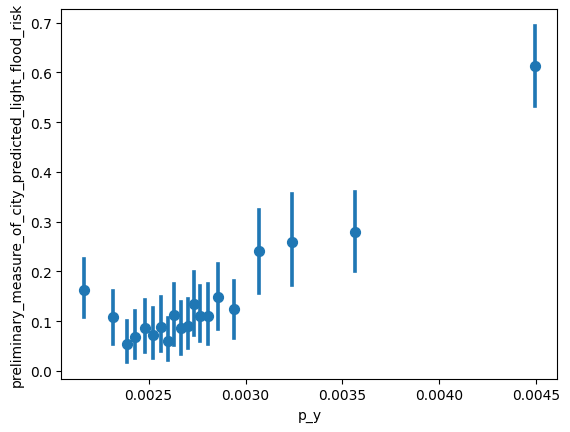

In [68]:
d['preliminary_measure_of_city_predicted_light_flood_risk'] = (d['dep_light_3_area'] > 0) * 1
print("fraction of areas with light flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_light_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_light_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_light_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



fraction of areas with moderate flood risk using this measure: 0.472
Optimization terminated successfully.
         Current function value: 0.690504
         Iterations 6
                                               Logit Regression Results                                              
Dep. Variable:     preliminary_measure_of_city_predicted_moderate_flood_risk   No. Observations:                 2325
Model:                                                                 Logit   Df Residuals:                     2323
Method:                                                                  MLE   Df Model:                            1
Date:                                                       Wed, 23 Oct 2024   Pseudo R-squ.:                0.001595
Time:                                                               14:02:31   Log-Likelihood:                -1605.4
converged:                                                              True   LL-Null:                       -1608.0
Cov

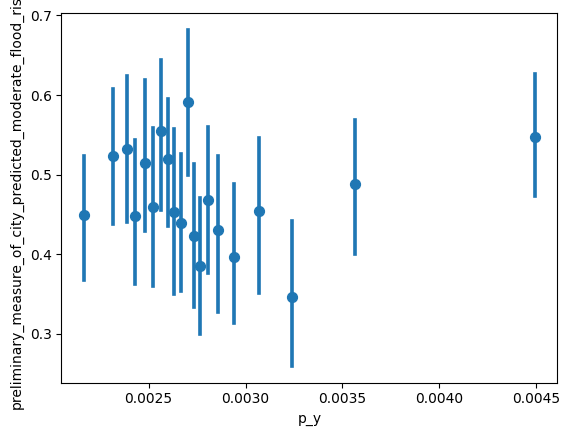

In [67]:
d['preliminary_measure_of_city_predicted_moderate_flood_risk'] = (d['dep_moderate_2_area'] > 0) * 1
print("fraction of areas with moderate flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_moderate_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_moderate_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_moderate_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



# flood sensors

In [75]:
d['any_sensors'] = d['n_sensors'] > 0
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no sensors: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_sensors'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_sensors'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no sensors: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_sensors'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_sensors'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no sensors: 0.959
Population in these locations: 1608640.000
Fraction of locations at percentile 90 or higher of p_y with no sensors: 0.944
Population in these locations: 799987.000
Fraction of locations at percentile 95 or higher of p_y with no sensors: 0.915
Population in these locations: 372994.000
fraction of locations with confirmed positive image with no sensors: 0.917
Population in these locations: 505984.000
